<a href="https://colab.research.google.com/github/stack-varun/varun08/blob/main/Business_Case_Netflix_Data_Exploration_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

# Upload the CSV file


--2025-01-27 11:49:42--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.239.15.217, 18.239.15.40, 18.239.15.11, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.239.15.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  --.-KB/s    in 0.03s   

2025-01-27 11:49:43 (95.4 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



The dataset provided consists of a list of all the TV shows/movies available on Netflix:

Show_id: Unique ID for every Movie / Tv Show
Type: Identifier - A Movie or TV Show
Title: Title of the Movie / Tv Show
Director: Director of the Movie
Cast: Actors involved in the movie/show
Country: Country where the movie/show was produced
Date_added: Date it was added on Netflix
Release_year: Actual Release year of the movie/show
Rating: TV Rating of the movie/show
Duration: Total Duration - in minutes or number of seasons
Listed_in: Genre
Description: The summary description

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV into a DataFrame
data = pd.read_csv('netflix.csv')

# Display the first few rows
data.head()

# Display the random few rows
#data.sample(5)



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


1. **Defining Problem Statement and Analysing basic metrics**





In [ ]:
data.info()  #Basic Info: Column names, column data type, number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.shape  #Total Records (No. of rows and columns)

(8807, 12)

In [ ]:
data.columns   #Key Attributes

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:

data.isnull().sum() * 100 / len(data)  # Percentage of null values

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


In [ ]:
data.isnull().sum() # Total NaN values


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
data.describe() # describing the data

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data['country'].value_counts()

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


2. **Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' missing value detection, statistical summary**

*   29.91% data of director column contains null
*   9.37% data of cast column contains null.
*   9.44% data of country column contains null
*   0.11% data of data_added column contains null
*   0.05% data of rating column contains null
*   0.03% data of duration column contains null

# Data Cleaning and Handle missing values

---



In [ ]:
data["director"].isna().sum() #2634 items of the director column are contains null values

2634

In [ ]:
data["director"] = data["director"].fillna("others")   #we will replace all NAN values of director column with "Others
data["director"].isna().sum()

0

In [ ]:
data["cast"].isna().sum()  #825 items of cast column are contains null values

825

In [ ]:
data["cast"]=data["cast"].fillna("others")  #we will replace all NAN values of cast column with "Others"
data["cast"].isna().sum()

0

In [ ]:
data["country"].isna().sum()  #Here 831 items of the director column are contains null values.


831

In [ ]:
data["country"].mode()[0]   ## Imputing the mode of the country column is a strategy for addressing null values in that column.

'United States'

In [ ]:
data["country"]=data["country"].fillna(data["country"].mode()[0])
data["country"].isna().sum()

0

In [ ]:
data["date_added"] = pd.to_datetime(data["date_added"], format='%B %d, %Y', errors='coerce')
#The format string '%B %d, %Y' is used to handle dates in the format "Month Day, Year".
#errors='coerce' will replace any dates that don't match the format with NaT (Not a Time) which can be handled separately if needed.

In [ ]:
data["date_added"].dtype

dtype('<M8[ns]')

In [ ]:
data["date_added"].isna().sum() #Imputing the mode of the date_added column is a strategy for addressing null values in that column.

98

In [ ]:
data["date_added"].mode()[0]

Timestamp('2020-01-01 00:00:00')

In [ ]:
data["date_added"]=data['date_added'].fillna(data["date_added"].mode()[0])

In [ ]:
data["date_added"].isna().sum()

0

In [ ]:
data["rating"].isna().sum()     # rating

4

Imputing the mode of the rating column is a strategy for addressing null values in that column.

let's see according to the type which is the most comman value in rating column.

In [ ]:
data["rating"].isnull().sum()

4

In [ ]:
data[data["type"]=="Movie"]["rating"].mode()[0]

'TV-MA'

In [ ]:
data[data["type"]=="TV Show"]["rating"].mode()[0]   #Given that the mode of the rating is consistent for both Movies and TV Shows, null values can be substituted with "TV-MA".

'TV-MA'

In [ ]:
data["rating"]=data["rating"].fillna(data["rating"].mode()[0])
data["rating"].isnull().sum()


0

Imputing the mode of the **duration** column is a strategy for addressing null values in that column.

let's see according to the type which is the most comman value in duration column.

In [ ]:
data["duration"].isna().sum()

3

In [ ]:
data[data["type"]=="Movie"]["duration"].isna().sum()

3

In [ ]:
data[data["type"]=="TV Shows"]["duration"].isna().sum()

0

**Observation**:- It is observed that only the Movies have null values and TV shows do not, Hence it would be meaningful to replace the null values of column duration with the mode of movie duration



In [ ]:
data[data["type"]=="Movie"]["duration"].mode()[0]

'90 min'

In [ ]:
data["duration"]=data["duration"].fillna(data[data["type"]=="Movie"]["duration"].mode()[0])

In [ ]:
data["duration"].isna().sum()

0

In [ ]:
data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0




**Observation**:-  All the null values has been taken care now












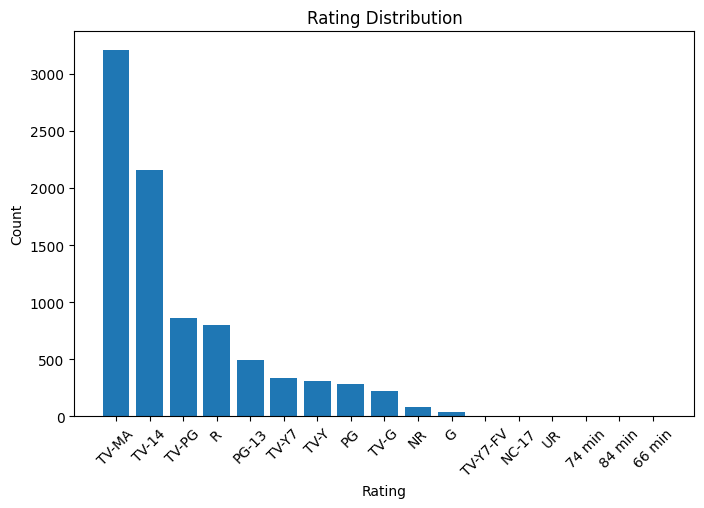

In [ ]:
x_bar=data['rating'].value_counts().index
y_bar=data['rating'].value_counts().values

#Creating bar plot
plt.figure(figsize=(8,5))
plt.bar(x_bar,y_bar)

#Adding label
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")

#Rotating X-axis label to 45 degree
plt.xticks(rotation=45)

#Display the plot
plt.show()

We can see that 3 unwanted values entered: **'74 min', '84 min', '66 min'**

We can eliminate these with the values to 'UR'; Because UR means, Unrated

In [ ]:
#Changing '74 min', '84 min', '66 min' values to UR
data["rating"]=np.where(np.isin(data['rating'], ['74 min', '84 min', '66 min']), 'UR', data['rating'])

#All incorrect data changes to "UR"

data["rating"].value_counts()

,count
rating,
TV-MA,3211
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


# **Data Visualisation**

In [ ]:
data["type"].value_counts()

,count
type,
Movie,6131
TV Show,2676


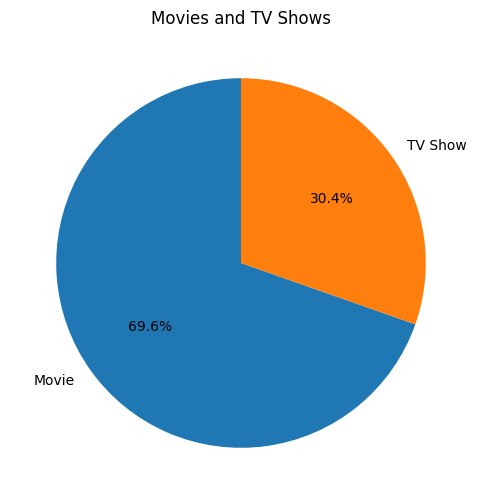

In [ ]:
type_counts=data["type"].value_counts()
total_shows=type_counts.sum()

#calculate proportation
proportion= type_counts/total_shows

#Plotting the pie chart

plt.figure(figsize=(6, 6))
plt.pie(proportion,labels=proportion.index,autopct='%1.1f%%',startangle =90 )
plt.title("Movies and TV Shows")

plt.show()

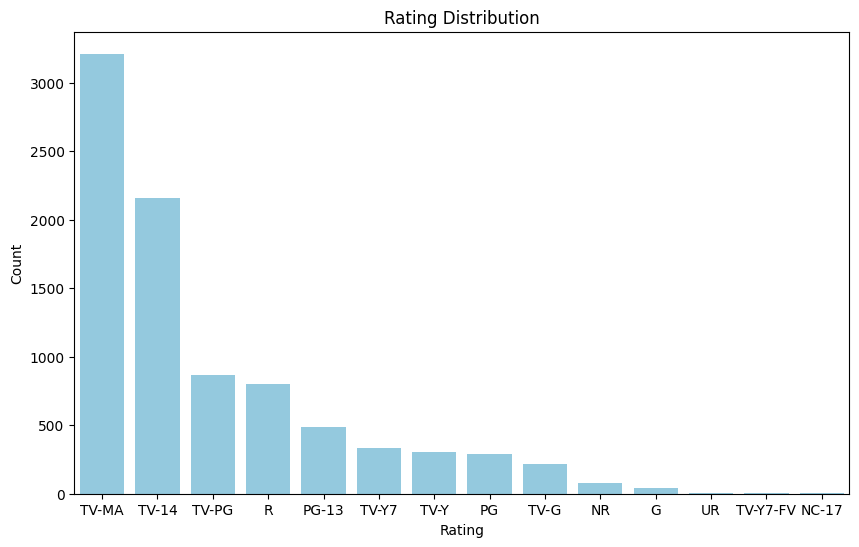

In [ ]:
# Count the occurrences of each rating
rate = data['rating'].value_counts().reset_index()

# Rename the columns for clarity
rate.columns = ['rating', 'count']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=rate, x='rating', y='count', color='skyblue')

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')

# Display the plot
plt.show()


**Observations**

*   Most used ratings TV-MA, TV-14, TV-PG is used in tv show.
*   That means Tv shows mostly for Mature or 14+.
*   R rating in fourth place used in Movies.
*   That means Movies in Netflix mostly for Mature.
*   We can say Netflix better place for adult, and mature content.


In [ ]:
# Rename "listed_in" column to "Genres"
data.rename({"listed_in":"Genres"},axis=1,inplace=True)
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,others,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Popular Genres

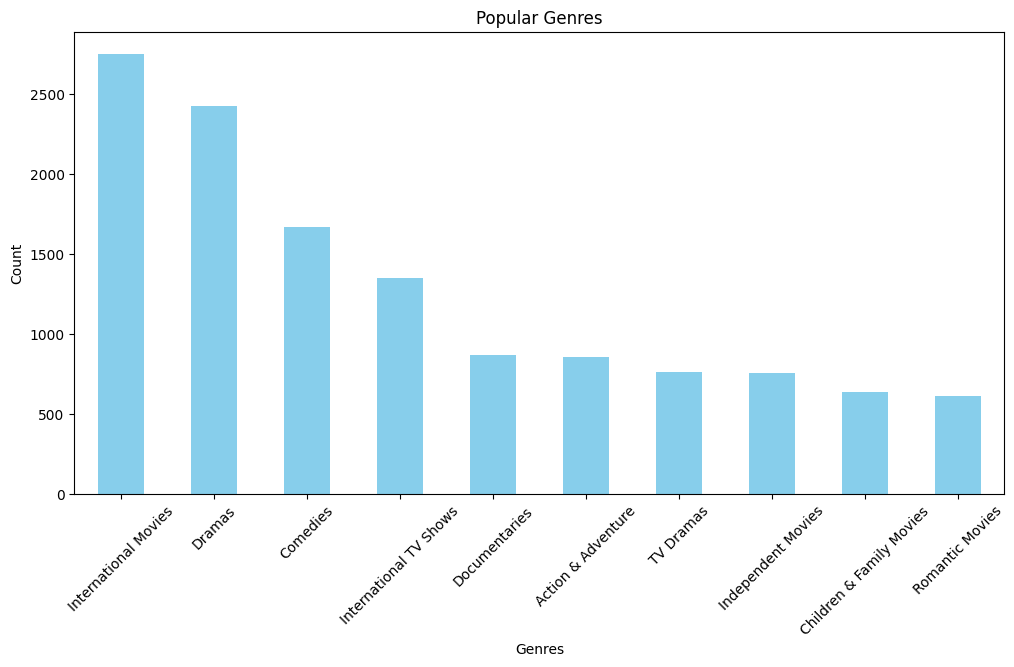

In [ ]:
#Extract the genres
split_genres=data["Genres"].str.split(", ").explode()

#count the genres
genres_count=split_genres.value_counts()

#Select top  genres
top_genres=genres_count.head(10)

#Creating bar plot
plt.figure(figsize=(12,6))
top_genres.plot(kind="bar",color="skyblue")

#Adding labels and title
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title("Popular Genres")

#Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

#Display the plot
plt.show()

#Insights
Most of the content on Netflix consists of international movies, dramas, and comedies.

International movies and TV shows dominate the top five, which is great for Netflix, as it shows the platform has a global user base.

When it comes to regular genres, drama takes the lead. This makes sense because drama often overlaps with other genres, and there aren’t many movies or TV shows that are strictly drama.

Next up is comedy, which is not surprising. Given that the real world can sometimes feel heavy, people are craving more laughter and light-hearted content.



# **Popularity - Country Wise**

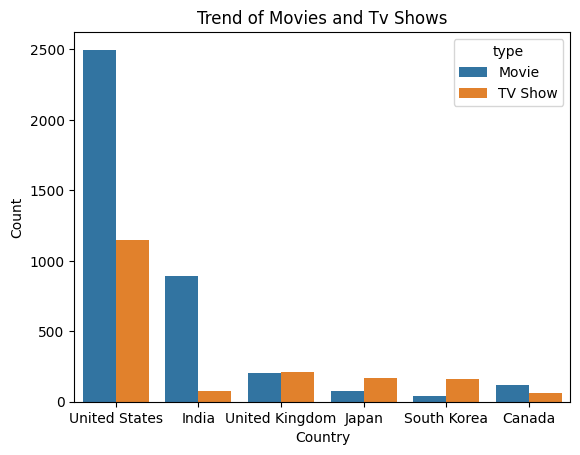

In [ ]:
#Creating bar plot
sns.countplot(data=data,x="country", hue="type",order=data["country"].value_counts().index[:6])

#Adding label
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Trend of Movies and Tv Shows")

#Display the plot
plt.show()

#Insights

* The United States dominates both the movie and TV show categories, with India holding a strong second place, followed by the United Kingdom and Japan
*  In India, movies are more popular than TV shows in the entertainment landscape
*  In South Korea and Japan, TV shows enjoy greater popularity than movies

In [ ]:
df_copy = data.copy()

In [ ]:
df_director = data.copy()

In [ ]:
df_director.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,others,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,others,others,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Unnesting the data

In [ ]:
def unnest(df,column):
    column_list = (df[column].apply(lambda x:str(x).split(", "))).tolist()
    column_df = pd.DataFrame(column_list,index=df["title"])
    column_stacked = column_df.stack()
    column_stacked = column_stacked.reset_index()
    column_stacked.drop(columns=['level_1'],inplace=True,axis =1)
    return column_stacked

In [ ]:
df_copy = data.copy()
df_director = data.copy()
df_director.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,others,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,others,others,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
director_stacked = unnest(df_director,'director')
director_stacked

,title,0
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,others
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,others
4,Kota Factory,others
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,others
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [ ]:
df_director=df_director.merge(director_stacked, on = 'title', how='inner')

In [ ]:
df_director.drop(columns=['director'],axis=1,inplace=True)

In [ ]:
df_director.rename(columns={0:'director'},inplace = True)

In [ ]:
df_director.head(2)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,Genres,description,director
0,s1,Movie,Dick Johnson Is Dead,others,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",others


# **Popularity - director**

In [ ]:
df_director["director"].value_counts()

,count
director,
others,2634
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
...,...
Raymie Muzquiz,1
Stu Livingston,1
Joe Menendez,1


**Observation**: Excluding "others," the directors behind the most popular shows and movies are Rajiv Chilaka, Jan Suter, and Raul Campos.





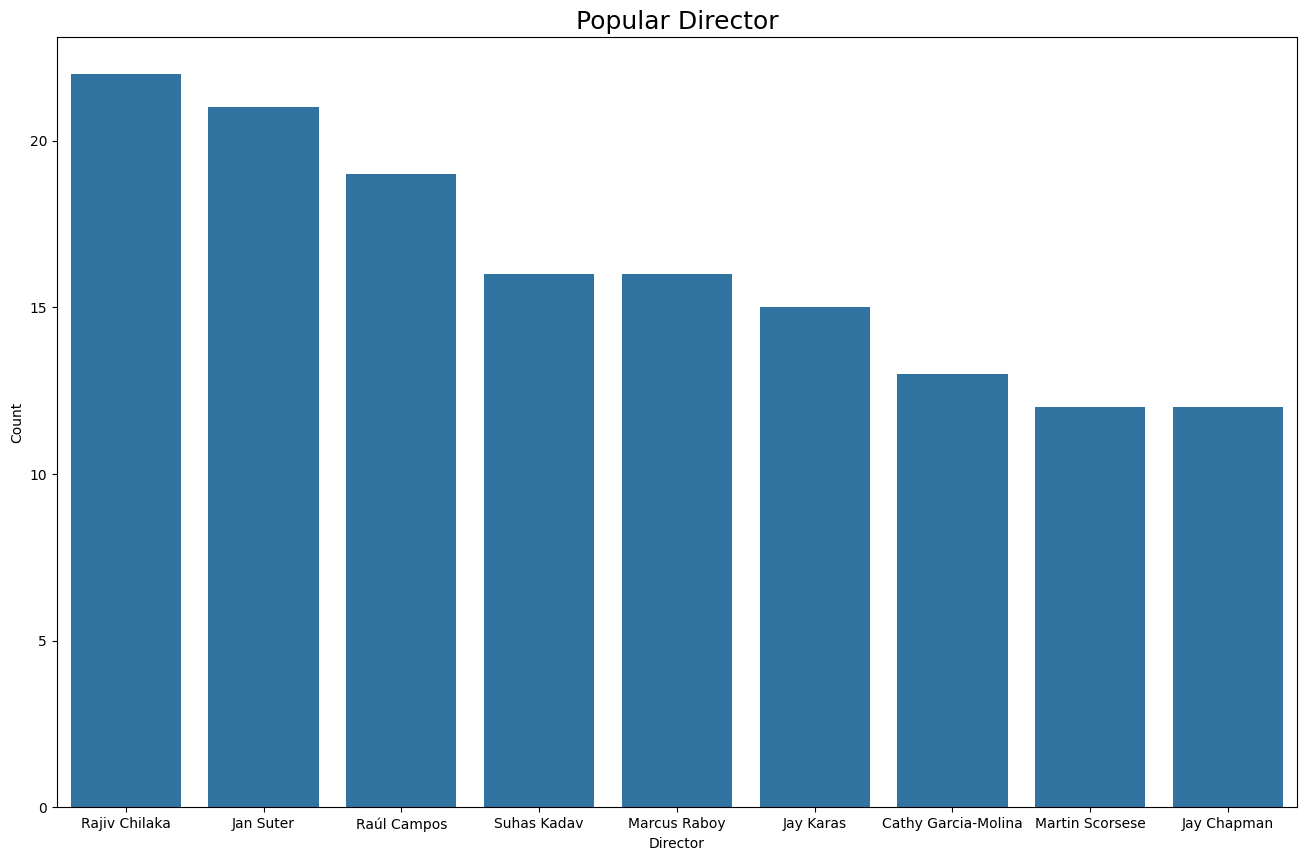

In [ ]:
# Creating Plot
plt.figure(figsize=(16,10))
sns.countplot(data=df_director,x="director",order=df_director["director"].value_counts().index[1:10])

#Adding label and title
plt.xlabel("Director")
plt.ylabel("Count")
plt.title("Popular Director",fontsize=18)

#Display the plot
plt.show()

In [ ]:
df_director[df_director["director"]=="Rajiv Chilaka"]["title"]

,title
441,Chhota Bheem - Neeli Pahaadi
442,Chhota Bheem & Ganesh
443,Chhota Bheem & Krishna: Mayanagari
444,Chhota Bheem & Krishna: Pataliputra- City of t...
445,Chhota Bheem And The Broken Amulet
446,Chhota Bheem And The Crown of Valhalla
447,Chhota Bheem and the Incan Adventure
448,Chhota Bheem and The ShiNobi Secret
449,Chhota Bheem Aur Hanuman
450,Chhota Bheem aur Krishna


**Observation:** Rajiv Chilaka's "Chhota Bheem" series and movies have gained tremendous popularity, especially among young audiences throughout India.

In [ ]:
df_director[(df_director['director']=="Jan Suter") | (df_director['director']=="Raúl Campos")]['country'].value_counts()

,count
country,
Mexico,22
Argentina,10
Chile,4
Colombia,4


In [ ]:
director_top3=df_director[(df_director['director']=="Jan Suter") | (df_director['director']=="Raúl Campos")]
director_top3.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,Genres,description,director
5107,s4750,Movie,Coco y Raulito: Carrusel de ternura,"Coco Celis, Raúl Meneses",Mexico,2018-07-27,2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good...",Raúl Campos
5108,s4750,Movie,Coco y Raulito: Carrusel de ternura,"Coco Celis, Raúl Meneses",Mexico,2018-07-27,2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good...",Jan Suter
5141,s4782,Movie,Luciano Mellera: Infantiloide,Luciano Mellera,Argentina,2018-07-06,2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...,Raúl Campos


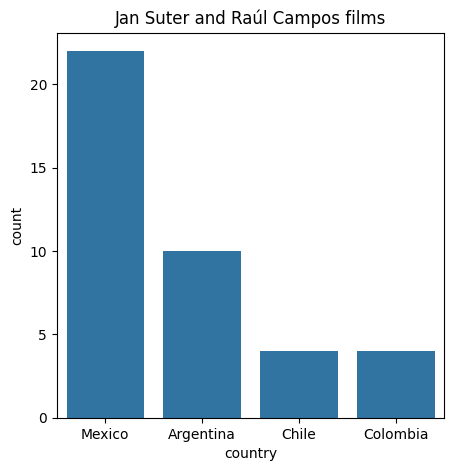

In [ ]:
#Creating Plot
plt.figure(figsize=(5,5))
sns.countplot(data=director_top3, x = 'country')

#Adding title
plt.title("Jan Suter and Raúl Campos films")

#Display the plot
plt.show()

#Insights
**Jan Suter and Raúl Campos** are key figures in the creation of popular South American cinema.

#6. Popularity - cast

In [ ]:
df_cast=data.copy()

In [ ]:
df_stacked=unnest(df_cast,"cast")
df_stacked

,title,0
0,Dick Johnson Is Dead,others
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [ ]:
#Merging two tables
df_cast=df_cast.merge(df_stacked,how="inner",on="title")

In [ ]:
#Droping existing cast column
df_cast.drop(columns=["cast"],inplace=True,axis=1)

In [ ]:
# Rename new col as :="cast"
df_cast.rename(columns={0:"cast"},inplace=True)

In [ ]:
df_cast.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,Genres,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",others
1,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata


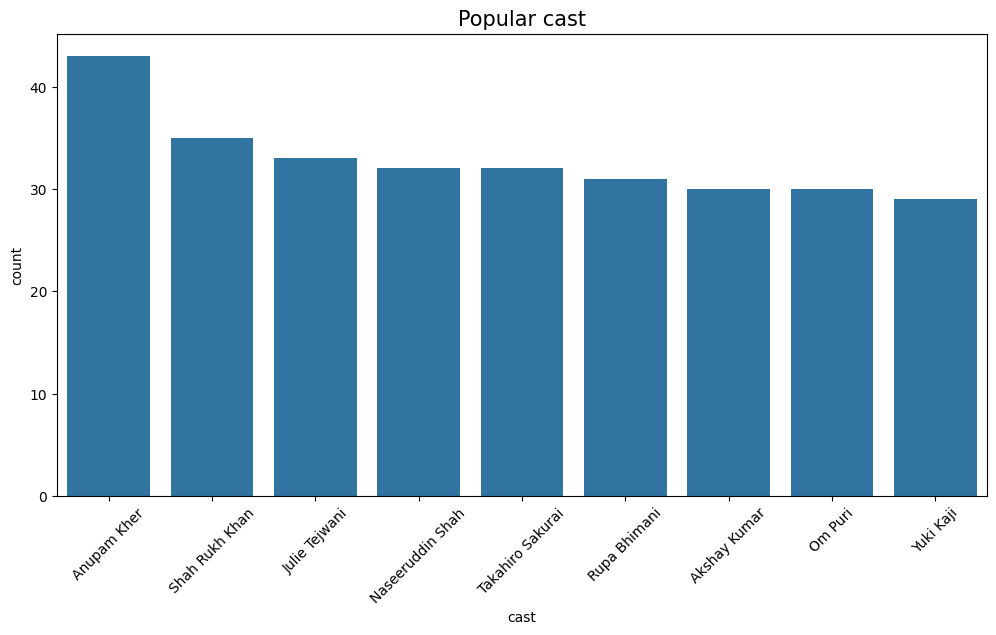

In [ ]:
#creating plot
plt.figure(figsize=(12,6))
sns.countplot(data=df_cast,x="cast",order=df_cast["cast"].value_counts().index[1:10])

#Adding title
plt.title("Popular cast",fontsize=15)

#Rotation x-axis labels to 45 degree
plt.xticks(rotation=45)

#Display the plot
plt.show()

#Insights

Anupam Kher boasts an extensive filmography, having appeared in numerous well-known films and TV shows. Following him are Shah Rukh Khan, Julie Tejwani, and Naseeruddin Shah. Additionally, Akshay Kumar is a prominent figure in the entertainment industry and has earned a spot among the top 10 actors.

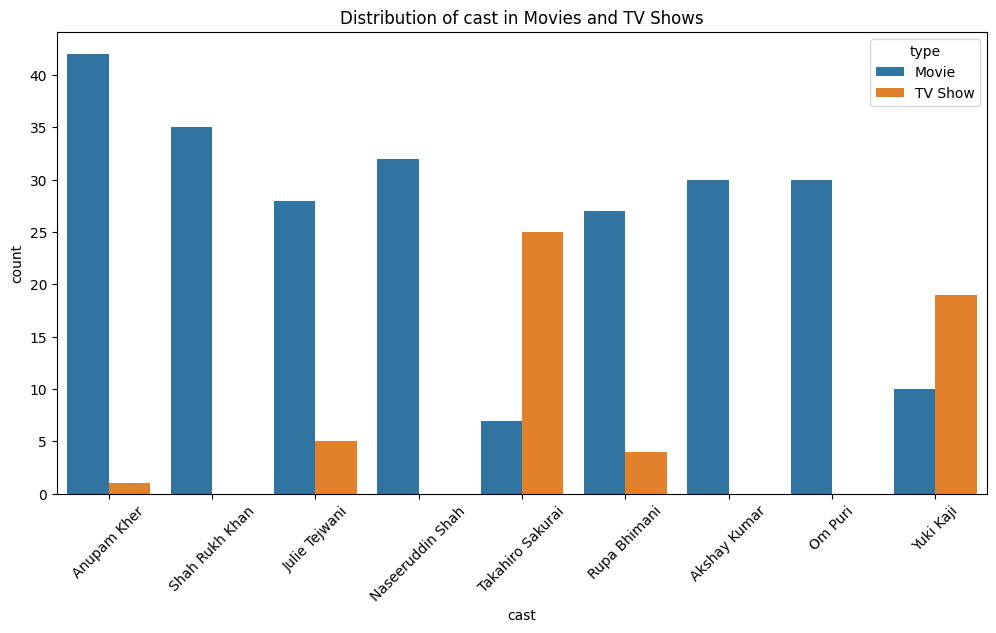

In [ ]:
#creating plot
plt.figure(figsize=(12,6))
sns.countplot(data=df_cast,x="cast",order=df_cast["cast"].value_counts().index[1:10], hue="type")

#Adding label
plt.title("Distribution of cast in Movies and TV Shows")

#Rotating x-axis label to 45 degree
plt.xticks(rotation=45)

#Display Plot
plt.show()

#Insights


It is observed that nearly all of the top 10 actors, except for Takahiro Sakurai and Yuki Kaji, have been frequently cast in popular movies. Takahiro Sakurai and Yuki Kaji stand out in the top 10 for their prominent roles in television shows, highlighting their significant contributions to the small screen rather than the film industry.

In [ ]:
movies=df_cast[df_cast["type"]=="Movie"]
series=df_cast[df_cast["type"]=="TV Show"]

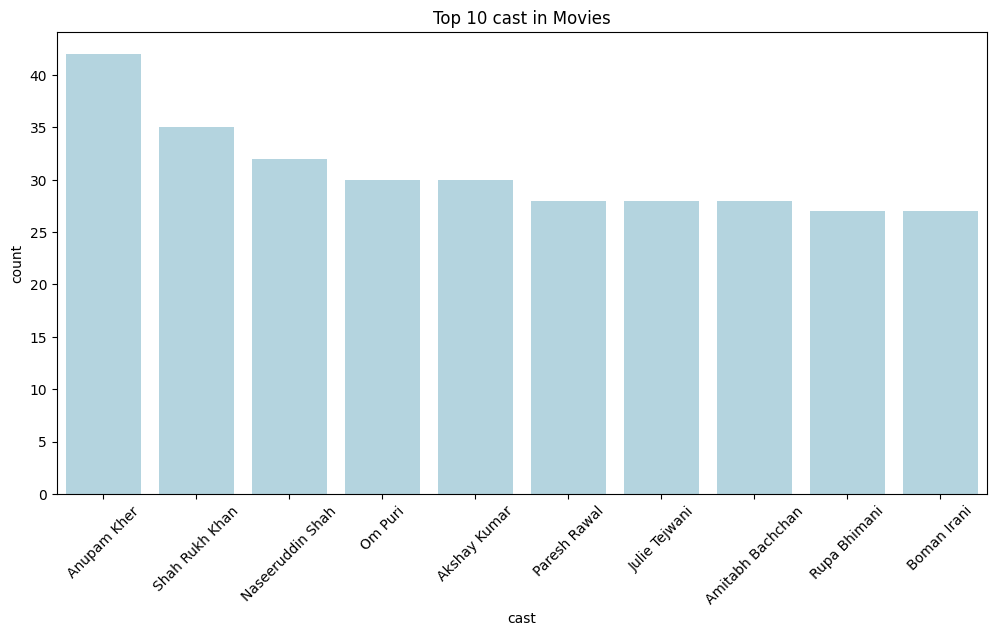

In [ ]:
#Top 10 cast in Movies

#Creating a plot
plt.figure(figsize=(12,6))
sns.countplot(data=movies,x="cast",order=movies["cast"].value_counts().index[1:11],color="lightblue")

#Adding title
plt.title("Top 10 cast in Movies")

#Rotating x-axis label to 45 degree
plt.xticks(rotation=45)

#Display plot
plt.show()

#Insights
   **Anupam Kher, Shah Rukh Khan, and Naseeruddin Shah** have consistently been featured in numerous popular TV shows.



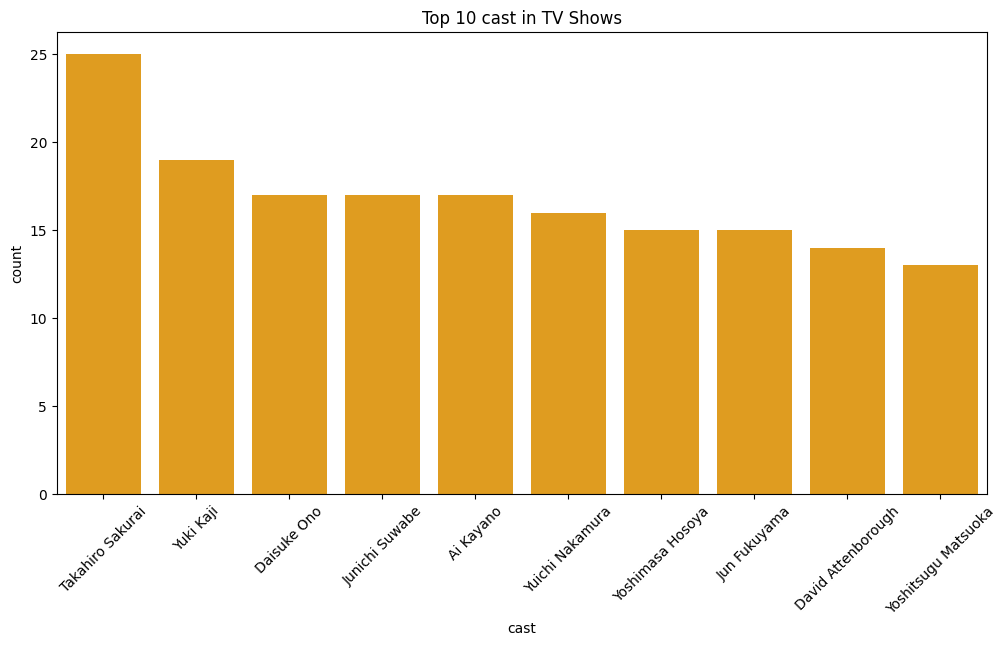

In [ ]:
#Top 10 cast in TV shows
#Creating plot
plt.figure(figsize=(12,6))
sns.countplot(data= series, x= "cast",order = series["cast"].value_counts().index[1:11],color="orange")

#Adding title
plt.title("Top 10 cast in TV Shows")

#Rotating x-axis label to 45 degree
plt.xticks(rotation=45)

#Display Plot
plt.show()

#Insights
**Takahiro Sakurai, Yuki Kaji, and Daisuke Ono** have consistently been
    featured in numerous popular TV shows.


# **Popularity - release_year**

In [ ]:
release_year_movies=movies["release_year"].value_counts().reset_index()[:10]
release_year_movies

,release_year,count
0,2018,5107
1,2017,4789
2,2016,4301
3,2019,4101
4,2020,3681
5,2015,2778
6,2014,1958
7,2021,1876
8,2013,1782
9,2012,1416


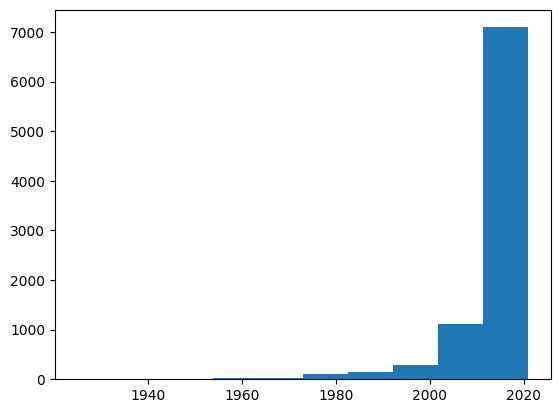

In [ ]:
count, bins, _ = plt.hist(data['release_year'])

In [ ]:
count

array([1.000e+00, 8.000e+00, 7.000e+00, 2.100e+01, 2.700e+01, 9.900e+01,
       1.500e+02, 2.940e+02, 1.107e+03, 7.093e+03])

In [ ]:
bins

array([1925. , 1934.6, 1944.2, 1953.8, 1963.4, 1973. , 1982.6, 1992.2,
       2001.8, 2011.4, 2021. ])

<Axes: xlabel='release_year', ylabel='Count'>

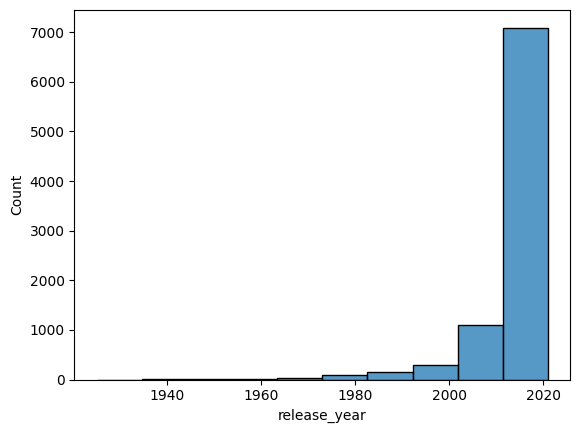

In [ ]:
sns.histplot(data['release_year'], bins=10)

In [ ]:
release_year_series=series["release_year"].value_counts().reset_index()[:10]
release_year_series

,release_year,count
0,2019,3386
1,2020,3333
2,2018,2601
3,2021,2350
4,2017,1956
5,2016,1609
6,2015,1215
7,2014,571
8,2013,477
9,2012,449


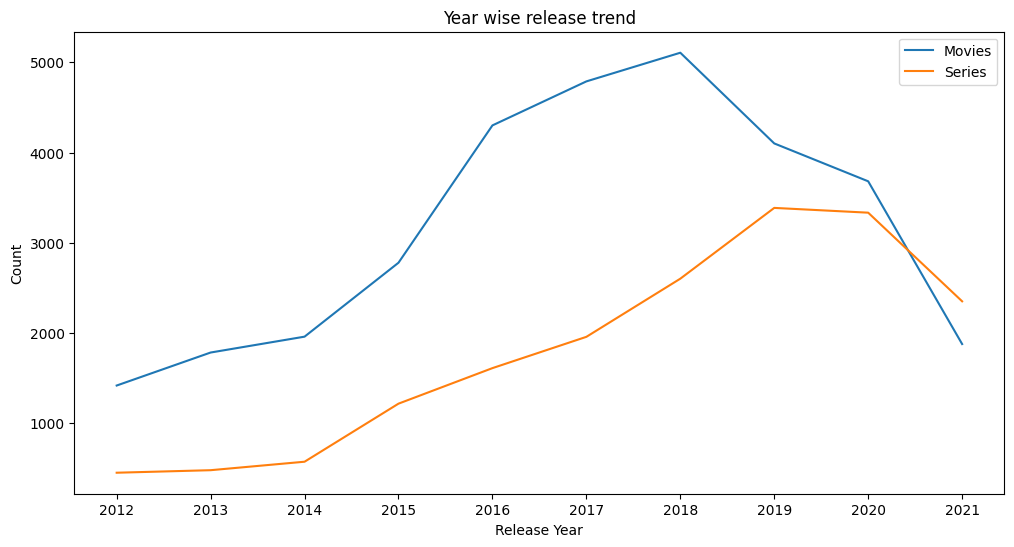

In [ ]:
# Creating plot
plt.figure(figsize=(12, 6))
movies = sns.lineplot(data=release_year_movies, x='release_year', y='count', label="Movies")
series = sns.lineplot(data=release_year_series, x='release_year', y='count', label="Series")

# Adding label, title and label
plt.xticks(release_year_movies["release_year"])  # Changed to "release_year"
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Year wise release trend")
plt.legend()

# Display plot
plt.show()

#Insights


*   The increase in content production between **2014 and 2018** could be attributed to the widespread availability of the internet, as improved connectivity and affordable plans encouraged users to adopt Over-The-Top (OTT) platforms.

*  However, **after 2019**, there was a decline in popularity, which may have been caused by the **COVID-19 pandemic**. With the world in lockdown, movie and TV show production faced significant challenges, leading to content created in haste becoming less popular.

#TV Shows and Day-wise content added

<ipython-input-77-d6a20408dfe8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_order['duration'] = duration_order['duration'].str.extract('(\d+)').astype(int)  # Extract duration as integer


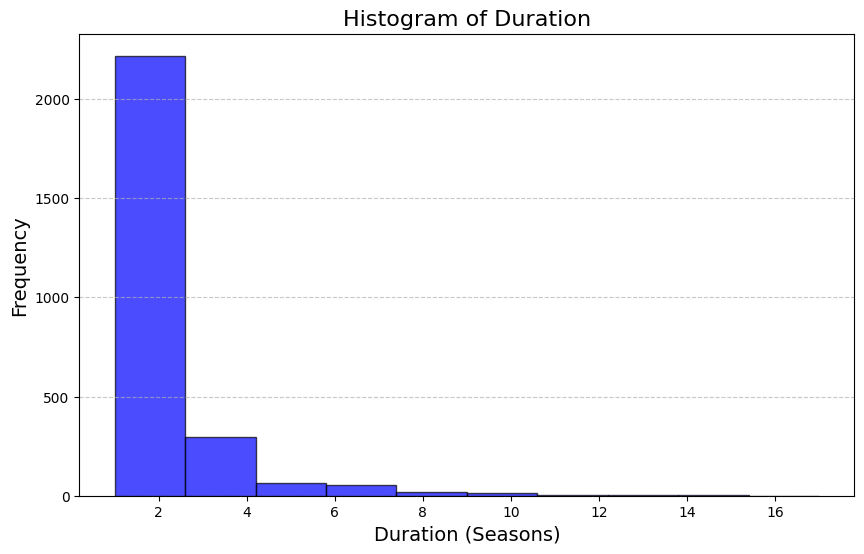

In [ ]:
# Ensure 'TV Show' has a 'duration' column and calculate the value counts
duration_order = data[data['type'] == 'TV Show']  # Create mock_data from TV Show data
duration_order['duration'] = duration_order['duration'].str.extract('(\d+)').astype(int)  # Extract duration as integer

plt.figure(figsize=(10, 6))
plt.hist(duration_order["duration"], bins=10, color="blue", alpha=0.7, edgecolor="black")

# Adding label and title

plt.title("Histogram of Duration", fontsize=16)
plt.xlabel("Duration (Seasons)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
 # Display plot

plt.show()


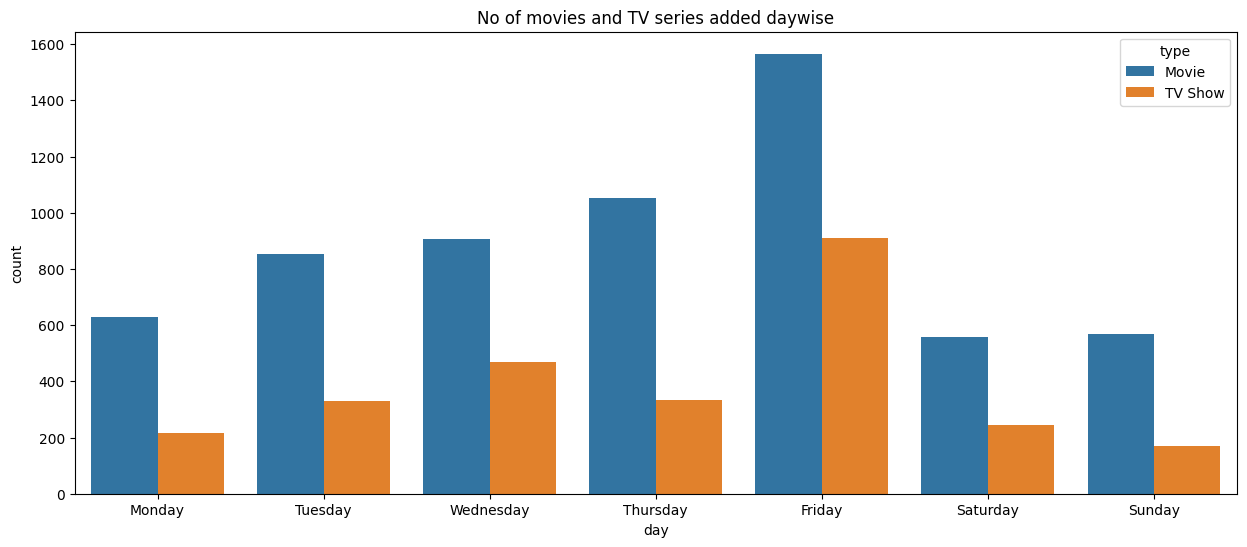

In [ ]:
df_datetime = data
df_datetime['day'] = data.date_added.dt.day_name()
plt.figure(figsize=(15,6))
sns.countplot(x = "day" , data = df_datetime, hue = "type" ,  order=["Monday" , "Tuesday" , "Wednesday", "Thursday", "Friday", "Saturday" ,"Sunday"])
plt.title("No of movies and TV series added daywise")
plt.show()


# Correlation Matrix

In [ ]:
country_tb = data[['show_id' , 'type' , 'country']]
country_tb.dropna(inplace = True)
country_tb['country'] = country_tb['country'].apply(lambda x : x.split(', '))
country_tb = country_tb.explode('country')
country_tb


<ipython-input-103-74d85df9502d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_tb.dropna(inplace = True)
<ipython-input-103-74d85df9502d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_tb['country'] = country_tb['country'].apply(lambda x : x.split(', '))


,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
2,s3,TV Show,United States
3,s4,TV Show,United States
4,s5,TV Show,India
...,...,...,...
8802,s8803,Movie,United States
8803,s8804,TV Show,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [ ]:
country_tb.country.nunique()


127

In [ ]:
country_tb.loc[country_tb['country'] == '']


,show_id,type,country
193,s194,TV Show,
365,s366,Movie,


In [ ]:
country_tb = country_tb.loc[country_tb['country'] != '']   #hence we can say that netflix is presnt in 127 country


country_tb['country'].nunique()


126

In [ ]:
movie_tv_div= country_tb.groupby(['country' , 'type'])['show_id'].count().reset_index()   #total movies and tv shows in each country.
movie_tv_div

,country,type,show_id
0,Afghanistan,Movie,1
1,Albania,Movie,1
2,Algeria,Movie,3
3,Angola,Movie,1
4,Argentina,Movie,71
...,...,...,...
181,Venezuela,Movie,4
182,Vietnam,Movie,7
183,West Germany,Movie,3
184,West Germany,TV Show,2


In [ ]:
# Lets check for top 10 countries
top_10_country = country_tb.country.value_counts().head(10).index
df_new = country_tb.loc[country_tb['country'].isin(top_10_country)]
df_new

,show_id,type,country
0,s1,Movie,United States
2,s3,TV Show,United States
3,s4,TV Show,United States
4,s5,TV Show,India
5,s6,TV Show,United States
...,...,...,...
8802,s8803,Movie,United States
8803,s8804,TV Show,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [ ]:
#  popular genres in top 10 countries
top_10_country = country_tb.country.value_counts().head(10).index
top_10_country = country_tb.loc[country_tb['country'].isin(top_10_country)]
top_10_country

,show_id,type,country
0,s1,Movie,United States
2,s3,TV Show,United States
3,s4,TV Show,United States
4,s5,TV Show,India
5,s6,TV Show,United States
...,...,...,...
8802,s8803,Movie,United States
8803,s8804,TV Show,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [ ]:
#  popular genres in top 10 countries
top_10_country = country_tb.country.value_counts().head(10).index
top_10_country = country_tb.loc[country_tb['country'].isin(top_10_country)]


# Instead of merging with top_genres Series, merge with the original DataFrame 'data'
# to get access to the 'show_id' and 'listed_in' (Genres) columns
x = top_10_country.merge(data[['show_id', 'Genres']], on='show_id').drop_duplicates()

# Extract genres from 'Genres' column and explode them
split_genres = x['Genres'].str.split(', ').explode()

# Get the top genres
top_genres = split_genres.value_counts().head(10).index

# Filter 'x' to include only the top genres
x = x[x['Genres'].str.contains('|'.join(top_genres))]

# we can group by country and listed_in (Genres)
country_genre = x.groupby(['country', 'Genres'])['show_id'].count().sort_values(ascending=False).reset_index()
country_genre = country_genre.pivot(index='Genres', columns='country', values='show_id')


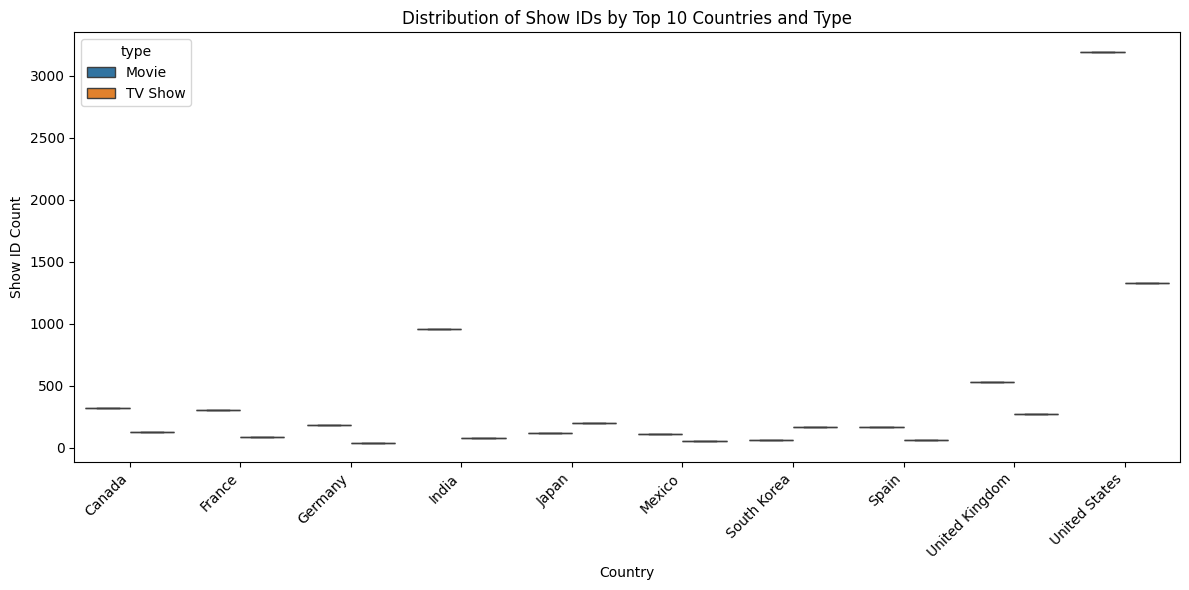

In [ ]:
# Get the top 10 countries based on show_id count
top_10_countries = country_tb['country'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 countries
filtered_country_tb = country_tb[country_tb['country'].isin(top_10_countries)]

# Group and aggregate data for the filtered DataFrame
country_genre = filtered_country_tb.groupby(['country', 'type'])['show_id'].count().reset_index()

# Create the boxplot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='show_id', hue='type', data=country_genre)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Distribution of Show IDs by Top 10 Countries and Type')
plt.xlabel('Country')
plt.ylabel('Show ID Count')
plt.tight_layout()
plt.show()

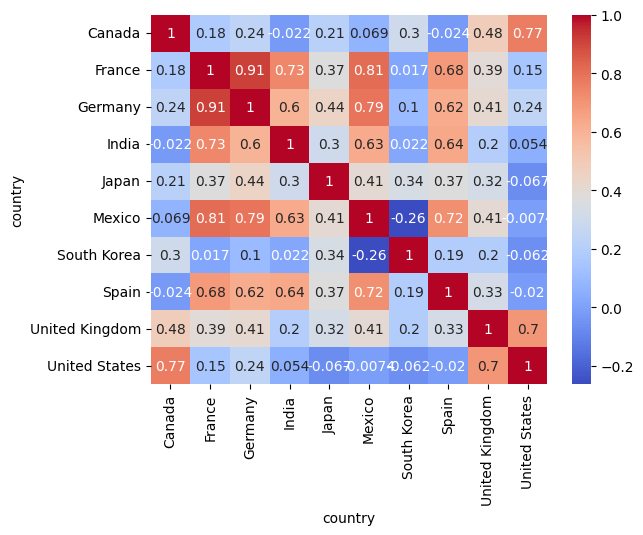

In [ ]:
sns.heatmap(country_genre.corr(), cmap= "coolwarm", annot=True)
plt.show()


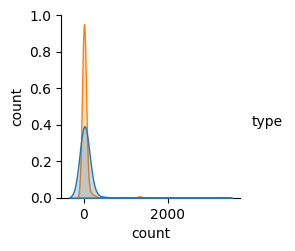

In [ ]:
# Assuming 'country_tb' has the 'type' column
country_genre = country_tb.groupby(['country', 'type'])['show_id'].count().reset_index()
country_genre = country_genre.pivot_table(
    index='country', columns='type', values='show_id', fill_value=0
)
# Reset the index to make 'country' a column again and bring 'type' back as values:
country_genre = country_genre.reset_index(level=0)
# Melt the DataFrame to have 'type' as a column
country_genre = country_genre.melt(id_vars=['country'], var_name='type', value_name='count')
sns.pairplot(data=country_genre, hue='type')  # Now 'type' is a column
plt.show()


## **All Insights and Observations**
*   The trend in TV series durations is characterized by a notable **concentration in the 2 and 3 seasons range**

*  Most popular TV shows are limited to 1 to 2 seasons.

*   **Most of the content added on netflix on "Friday"** followed by Thursday as weekend appraohes after these days.

*  69.62% of the total content consists of movies, while 30.38% are TV shows, indicating that movies are more popular than TV shows.

* Netflix has movies from total 127 countries, United States being the highset contributor with almost 37% of all the content.

*  Mature audience TV shows (TV-MA) are the most popular, followed by shows aimed at kids aged 14 and above.

*  The United States leads globally in both TV shows and movies, with India in second place, followed by the United Kingdom and Japan.

*  In India, movies are more popular than TV shows.

*  In South Korea and Japan, TV shows are more popular than movies.

*  The directors responsible for the most popular shows and movies include Rajiv Chilaka, Jan Suter, and Raul Campos.

*  Rajiv Chilaka's "Chhota Bheem" series and movies are particularly popular among children in India.

*  Jan Suter and Raúl Campos are known for producing popular South American films.

*  Anupam Kher has appeared in many popular movies and TV shows, followed by Shah Rukh Khan, Julie Tejwani, and Naseeruddin Shah.

*  Takahiro Sakurai and Yuki Kaji have starred in numerous popular TV shows.
*  The uploading of movies and TV shows on Netflix began in 2008, with relatively fewer additions until 2014.

*  There's a noticeable drop in content added in 2020 and 2021, possibly due to the pandemic, particularly affecting movies.

*  The surge in content production between 2014 and 2018 can likely be attributed to the widespread availability of the internet, with improved connectivity and more affordable plans enabling users to embrace Over-The-Top (OTT) platforms.

*  After 2019, there was a decline in popularity, likely due to the COVID-19 pandemic. With global lockdowns, movie and TV show production faced challenges, leading to hastily created content becoming less popular.


## **Recommendations**

*  Given that movies dominate Netflix's popular content, it is recommended to strategically focus on increasing movie production. This approach would enrich Netflix's content library and better cater to the preferences of a wider audience

*  Considering the growing popularity of TV-MA content for mature audiences, along with the significant following of TV-14 content for viewers aged 14 and above, it’s advisable for Netflix to increase its production of content targeting both adults and children

*  As movies and TV shows from the United States are particularly popular, a strategic recommendation would be for Netflix to explore collaborations with US-based directors and writers to further strengthen its content offerings

*  Rajiv Chilaka, the Indian animator behind the popular Chhota Bheem franchise, has created the most widely recognized content for children. He is followed by Jan Suter and Raul Campos, who are known for their South American films. Therefore, Netflix should consider expanding its portfolio of animated children's content and work more closely with South American filmmakers

*  Movies featuring well-known Indian actors such as Anupam Kher, Shah Rukh Khan, and Naseeruddin Shah have proven to be popular on Netflix. Given this, it is recommended that Netflix include more films starring classic Indian actors to cater to the tastes of their audience

*  Since TV shows featuring Takahiro Sakurai and Yuki Kaji are quite popular, Netflix should consider working with these Japanese artists. This could help the platform broaden its global content offerings and appeal to a wider international audience

*  Finally, it is recommended to limit TV show seasons to 1 to 2 seasons to maintain content quality and avoid viewer fatigue